# KNN & SVM

KNN & SVM ---> Only for Smaller Datasets (Less than 1000 Rows), Computationally Expensive

KNN - K-Nearest Neighbours

In [1]:
from warnings import filterwarnings

filterwarnings("ignore")

### Step 1 - Data Ingestion

In [2]:
import pandas as pd

df = pd.read_csv("iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Target Feature

In [3]:
df["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

### Step 2 - Data Quality Checks

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
m = df.isna().sum()
m

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(1)

In [7]:
df = df.drop_duplicates(keep="first").reset_index(drop=True)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
df.shape

(149, 5)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   species       149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


### Step 3 - Separate X & Y

In [10]:
X = df.drop(columns=["species"])
Y = df[["species"]]

In [11]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
Y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [13]:
Y.value_counts()

species   
setosa        50
versicolor    50
virginica     49
Name: count, dtype: int64

### Step 4 - Preprocessing on X

In [14]:
X.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object

In [15]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [16]:
num_pipe = make_pipeline(SimpleImputer(strategy="median"), StandardScaler()).set_output(
    transform="pandas"
)

In [18]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.898033,1.012401,-1.333255,-1.308624
1,-1.139562,-0.137353,-1.333255,-1.308624
2,-1.381091,0.322549,-1.390014,-1.308624
3,-1.501855,0.092598,-1.276496,-1.308624
4,-1.018798,1.242352,-1.333255,-1.308624


### Step 5 - Train Test Split

In [19]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
    X_pre, Y, test_size=0.4, random_state=42
)

In [20]:
xtrain.head()

,sepal_length,sepal_width,petal_length,petal_width
122,2.241842,-0.597255,1.674949,1.059614
24,-1.260327,0.782450,-1.049462,-1.308624
25,-1.018798,-0.137353,-1.219738,-1.308624
23,-0.898033,0.552499,-1.162979,-0.913917
93,-1.018798,-1.747009,-0.254842,-0.256073


In [21]:
xtest.head()

,sepal_length,sepal_width,petal_length,petal_width
73,0.309611,-0.597255,0.539778,0.007064
18,-0.173447,1.702254,-1.162979,-1.177055
117,2.241842,1.702254,1.674949,1.322752
78,0.188846,-0.367304,0.426261,0.401770
76,1.154962,-0.597255,0.596536,0.270202


In [22]:
ytrain.head()

,species
122,virginica
24,setosa
25,setosa
23,setosa
93,versicolor


In [23]:
ytest.head()

,species
73,versicolor
18,setosa
117,virginica
78,versicolor
76,versicolor


In [24]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((89, 4), (60, 4), (89, 1), (60, 1))

### Step 6 - Model Building

In [25]:
from sklearn.neighbors import KNeighborsClassifier

# K-Nearest Neighbors Classifier
# What is KNN?
# KNN is a non-parametric, instance-based learning algorithm used for classification and regression tasks

model1 = KNeighborsClassifier(n_neighbors=30)
model1.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=30)

In [26]:
model1.score(xtrain, ytrain), model1.score(xtest, ytest)

(0.8539325842696629, 0.9)

Hyperparameter Tuning

In [27]:
params = {
    "n_neighbors": [5, 6, 7, 8, 9, 10, 11],
}
params

{'n_neighbors': [5, 6, 7, 8, 9, 10, 11]}

In [31]:
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
gscv_knn = GridSearchCV(knn, params, cv=5, scoring="f1_macro", n_jobs=-1)
gscv_knn.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [5, 6, 7, 8, 9, 10, 11]},
             scoring='f1_macro')

In [32]:
gscv_knn.best_params_

{'n_neighbors': 6}

In [33]:
gscv_knn.best_score_

np.float64(0.9012476412476413)

In [34]:
best_knn = gscv_knn.best_estimator_
best_knn

KNeighborsClassifier(n_neighbors=6)

In [35]:
best_knn.score(xtrain, ytrain), best_knn.score(xtest, ytest)

(0.9438202247191011, 1.0)

In [36]:
from sklearn.metrics import f1_score

ypred_test1 = best_knn.predict(xtest)
f1_score(ytest, ypred_test1, average="macro")

1.0

# SVM - Support Vector Machines

In [37]:
from sklearn.svm import SVC

# SVM - Support Vector Machines
# What is SVM?
# SVM is a supervised learning algorithm used for classification and regression tasks

model_svc = SVC(probability=True)
model_svc.fit(xtrain, ytrain)

SVC(probability=True)

In [39]:
model_svc.score(xtrain, ytrain), model_svc.score(xtest, ytest)

(0.9550561797752809, 1.0)

In [41]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model_svc, xtrain, ytrain, cv=5, scoring="f1_macro")
scores

array([0.94871795, 0.77142857, 0.94405594, 1.        , 0.94405594])

In [42]:
scores.mean()

np.float64(0.9216516816516818)

### Based on Cross Validation Score, SVN is marginally better than KNN for this dataset

### Step 7 - Model Evaluation

In [43]:
model_svc.score(xtrain, ytrain), model_svc.score(xtest, ytest)

(0.9550561797752809, 1.0)

In [44]:
ypred_test2 = model_svc.predict(xtest)
f1_score(ytest, ypred_test2, average="macro")

1.0

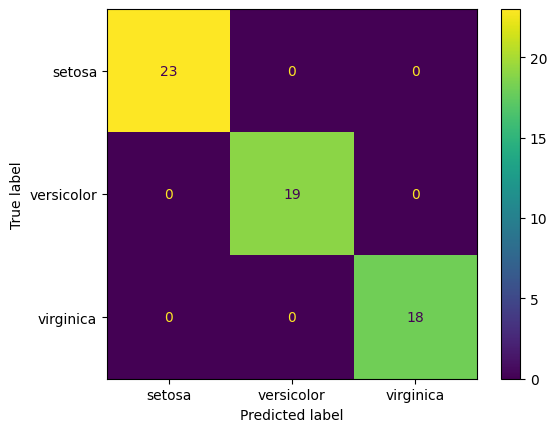

In [47]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

ConfusionMatrixDisplay.from_estimator(
    model_svc,
    xtest,
    ytest,
)

In [48]:
print(classification_report(ytest, ypred_test2))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        23
  versicolor       1.00      1.00      1.00        19
   virginica       1.00      1.00      1.00        18

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



### Step 8 - Out of Sample Prediction

In [53]:
xnew = pd.read_csv("iris_sample.csv")
xnew

,sepal_length,sepal_width,petal_length,petal_width
0,5.5,2.5,4.0,1.3
1,6.9,3.1,5.1,2.3
2,5.1,2.5,3.0,1.1
3,4.4,2.9,NaN,0.2
4,5.9,3.0,5.1,1.8
5,5.5,3.5,1.3,0.2
6,5.6,NaN,3.6,1.3
7,6.5,3.0,5.2,2.0
8,5.3,3.7,1.5,0.2
9,5.1,3.4,1.5,NaN


In [50]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [52]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.414976,-1.287108,0.142468,0.138633
1,1.275726,0.092598,0.766812,1.454321
2,-0.898033,-1.287108,-0.425118,-0.124505
3,-1.743384,-0.367304,0.312744,-1.308624
4,0.068082,-0.137353,0.766812,0.796477


In [54]:
preds = model_svc.predict(xnew_pre)
preds

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'versicolor', 'virginica'],
      dtype=object)

In [55]:
probs = model_svc.predict_proba(xnew_pre)
probs

array([[0.0084343 , 0.9566584 , 0.0349073 ],
       [0.01451228, 0.03045638, 0.95503134],
       [0.03534738, 0.9432342 , 0.02141843],
       [0.4730598 , 0.41644472, 0.11049549],
       [0.01359497, 0.21693416, 0.76947086],
       [0.95356051, 0.02552161, 0.02091788],
       [0.03592378, 0.95154116, 0.01253506],
       [0.01063245, 0.04759357, 0.94177398],
       [0.95817137, 0.02315846, 0.01867017],
       [0.75359436, 0.17733156, 0.06907407],
       [0.01248054, 0.97752106, 0.0099984 ],
       [0.0151678 , 0.97098654, 0.01384566],
       [0.02574311, 0.03214756, 0.94210933],
       [0.0200283 , 0.73155265, 0.24841904],
       [0.02234091, 0.4644503 , 0.51320879]])

In [57]:
xnew["species_pred"] = preds
xnew[model_svc.classes_] = probs.round(4)
xnew

,sepal_length,sepal_width,petal_length,petal_width,species_pred,setosa,versicolor,virginica
0,5.5,2.5,4.0,1.3,versicolor,0.0084,0.9567,0.0349
1,6.9,3.1,5.1,2.3,virginica,0.0145,0.0305,0.9550
2,5.1,2.5,3.0,1.1,versicolor,0.0353,0.9432,0.0214
3,4.4,2.9,NaN,0.2,setosa,0.4731,0.4164,0.1105
4,5.9,3.0,5.1,1.8,virginica,0.0136,0.2169,0.7695
5,5.5,3.5,1.3,0.2,setosa,0.9536,0.0255,0.0209
6,5.6,NaN,3.6,1.3,versicolor,0.0359,0.9515,0.0125
7,6.5,3.0,5.2,2.0,virginica,0.0106,0.0476,0.9418
8,5.3,3.7,1.5,0.2,setosa,0.9582,0.0232,0.0187
9,5.1,3.4,1.5,NaN,setosa,0.7536,0.1773,0.0691


In [58]:
xnew.to_csv("svc_results.csv", index=False)

### Step 9 - Save and Load

In [59]:
import joblib

joblib.dump(num_pipe, "pre.joblib")
joblib.dump(model_svc, "svc.joblib")

['svc.joblib']

In [60]:
p = joblib.load("pre.joblib")
p

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [61]:
m = joblib.load("svc.joblib")
m

SVC(probability=True)

In [62]:
m.score(xtrain, ytrain), m.score(xtest, ytest)

(0.9550561797752809, 1.0)